Here’s another Bayes puzzle:

Suppose we visit a wild animal preserve where we know that the only animals are lions and tigers and bears, but we don’t know how many of each there are.

During the tour, we see 3 lions, 2 tigers, and one bear. Assuming that every animal had an equal chance to appear in our sample, estimate the prevalence of each species.

What is the probability that the next animal we see is a bear?


In [1]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import arviz as az

In [2]:
n_animals = 3

with pm.Model() as zoo_model:
    mix = pm.Dirichlet('mix', np.ones(n_animals), shape=n_animals)
    seen_animals = pm.Multinomial('seen_animals', n=6, p=mix, observed=np.array([3, 2, 1]))
    next_seen = pm.Multinomial('next_seen', n=1, p=mix, shape=n_animals)
    trace = pm.sample(20_000, tune=1000)

data = az.from_pymc3(trace=trace, 
                 coords={'animal': np.array(['lion', 'tiger', 'bear'])}, 
                 dims={'mix': ['animal'], 'next_seen': ['animal']})

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mix]
>Metropolis: [next_seen]
Sampling 4 chains, 0 divergences: 100%|██████████| 84000/84000 [00:27<00:00, 3030.54draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd21c7660a0>,
      dtype=object)

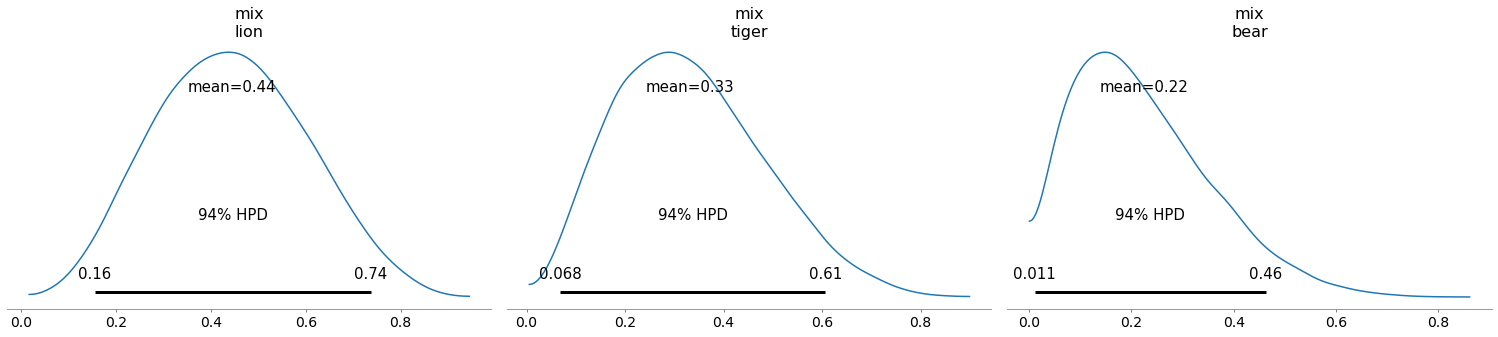

In [4]:
az.plot_posterior(data, var_names='mix', )#combined=True, round_to=2);

In [ ]:
data.posterior.next_seen.mean(dim=['chain', 'draw']).to_dataframe()

Suppose there are six species that might be in a zoo: lions and tigers and bears, and cats and rats and elephants.  Every zoo has a subset of these species, and every subset is equally likely.

One day we visit a zoo and see 3 lions, 2 tigers, and one bear.  Assuming that every animal in the zoo has an equal chance to be seen, what is the probability that the next animal we see is an elephant?

In [ ]:
n_animals = 6

with pm.Model() as zoo_model:
    mix = pm.Dirichlet('mix', np.ones(n_animals), shape=n_animals)
    seen_animals = pm.Multinomial('seen_animals', n=6, p=mix, observed=np.array([3, 2, 1, 0, 0, 0]))
    next_seen = pm.Multinomial('next_seen', n=1, p=mix, shape=n_animals)
    trace = pm.sample(20_000, tune=1000)

data = az.from_pymc3(trace=trace, 
                 coords={'animal': np.array(['lion', 'tiger', 'bear', 'cats', 'rats', 'elephants'])}, 
                 dims={'mix': ['animal'], 'next_seen': ['animal']})

In [ ]:
az.plot_posterior(data, var_names='mix', combined=True, round_to=2);

In [ ]:
data.posterior.next_seen.mean(dim=['chain', 'draw']).to_dataframe()